In [1]:
import torch
from model.layers import Linear, Relu, Tanh, Leaky_Relu, Elu, Sigmoid
from model.loss_func import MSELoss
from model.optimizers import SGD, AdaGrad, Adam, MomentumSGD
from model.Sequential import Sequential
from matplotlib import pyplot as plt
from helpers import normalize, generate_disc_set, train, cross_validation, one_hot_encoding, train_cv

In [30]:
# initial setups
torch.manual_seed(100)
nb_epochs = 100
batch_size = 50

# Generate training and test data sets and normalize
train_input, train_label= generate_disc_set(1000)
test_input, test_label = generate_disc_set(1000)
train_target = one_hot_encoding(train_label)
test_target = one_hot_encoding(test_label)
train_input = normalize(train_input)
test_input = normalize(test_input)

# K-fold cross validation to optimize learning rate over range lr_set
k_fold = 5

In [31]:
def plotLossAcc(loss_tr, loss_te, acc_tr, acc_te, x_var, xlabel):
    """
    Plot the loss accuracy
    :param loss_tr: training loss
    :param loss_te: testing loss
    :param acc_tr: trainig accuracy
    :param acc_te: testing accuracy
    :param x_var: variable for x axis
    :param xlabel: label for x axis
    :plot the training, validation loss and their accuracy
    """
    fig, ax1 = plt.subplots()
    color_tr = 'tab:green'
    color_te = 'tab:blue'
    color_tra = 'tab:orange'
    color_tea = 'tab:purple'
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel("loss")
    ax1.plot(x_var, loss_tr, color=color_tr)
    ax1.plot(x_var, loss_te, color=color_te)
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    ax2.plot(x_var, acc_tr, color=color_tra)
    ax2.plot(x_var, acc_te, color=color_tea)
    ax2.set_ylabel("accuracy")
    ax1.legend(['train_loss', 'test_loss'], loc='lower right')
    ax2.legend(['train_accuracy', 'test_accuracy'], loc='upper right')
    ax1.set_title("Loss and accuracy")

### a. Activation function comparison

We use SGD as optimizer and MSE as loss function to test the loss convergence of different models with corresponding activation functions.  
Relu, Elu, Leaky Relu and Tanh are tested with 100 epochs

In [32]:
torch.manual_seed(100)
optimizer_name = SGD
loss_name = MSELoss()

##### 1. ReLU

In [33]:
# cross validation
torch.manual_seed(100)
lr_set = torch.logspace(-1 ,0, 5)
model= Sequential(Linear(2,25), Relu(), Linear(25,25), Relu(),Linear(25,25), Relu(), Linear(25,2), Tanh())
best_lr = cross_validation(model, optimizer_name, nb_epochs, batch_size, loss_name, k_fold, lr_set, train_input,train_target)
print(best_lr)

Running cross validation. Progress:   0.0 %
Running cross validation. Progress:   20.0 %
Running cross validation. Progress:   40.0 %
Running cross validation. Progress:   60.0 %
Running cross validation. Progress:   80.0 %
0.10000000149011612


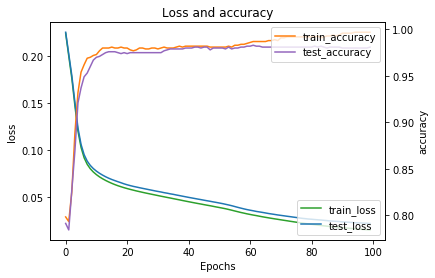

In [35]:
torch.manual_seed(100)
model.reset()
# set up optimizers
optimizer = optimizer_name(model, lr = best_lr)
# model training
loss_train_relu, loss_test, acc_train, acc_test = train_cv(model, loss_name, optimizer,train_input,train_target,test_input,test_target, nb_epochs = nb_epochs, batch_size=batch_size)
# plots
plotLossAcc(loss_train_relu, loss_test, acc_train, acc_test, torch.arange(nb_epochs), "Epochs")
plt.show()

#### 2. Elu

In [36]:
# cross validation
torch.manual_seed(100)
lr_set = torch.logspace(-3, 0, 5)
model= Sequential(Linear(2,25), Elu(), Linear(25,25), Elu(), Linear(25,25), Elu(), Linear(25,2), Tanh())
best_lr = cross_validation(model, optimizer_name, nb_epochs, batch_size, loss_name, k_fold, lr_set, train_input,train_target)
print(best_lr)

Running cross validation. Progress:   0.0 %
Running cross validation. Progress:   20.0 %
Running cross validation. Progress:   40.0 %
Running cross validation. Progress:   60.0 %
Running cross validation. Progress:   80.0 %
1.0


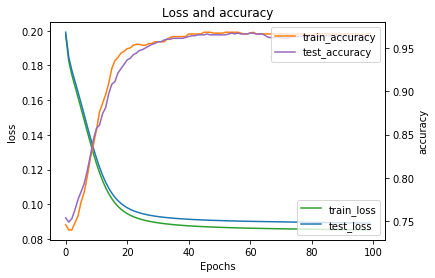

In [39]:
torch.manual_seed(100)
model.reset()
# set up optimizers
optimizer = optimizer_name(model, lr = best_lr)
# model training
loss_train_elu, loss_test, acc_train, acc_test = train_cv(model, loss_name, optimizer,train_input,train_target,test_input,test_target, nb_epochs = nb_epochs, batch_size=batch_size)
# plots
plotLossAcc(loss_train_elu, loss_test, acc_train, acc_test, torch.arange(nb_epochs), "Epochs")
plt.show()

#### 3. Leaky Relu

In [46]:
# cross validation
torch.manual_seed(100)
lr_set = torch.logspace(-1, 0, 5)
model= Sequential(Linear(2,25), Leaky_Relu(), Linear(25,25), Leaky_Relu(),Linear(25,25), Leaky_Relu(), Linear(25,2), Tanh())
best_lr = cross_validation(model, optimizer_name, nb_epochs, batch_size, loss_name, k_fold, lr_set, train_input,train_target)
print(best_lr)

Running cross validation. Progress:   0.0 %
Running cross validation. Progress:   20.0 %
Running cross validation. Progress:   40.0 %
Running cross validation. Progress:   60.0 %
Running cross validation. Progress:   80.0 %
0.10000000149011612


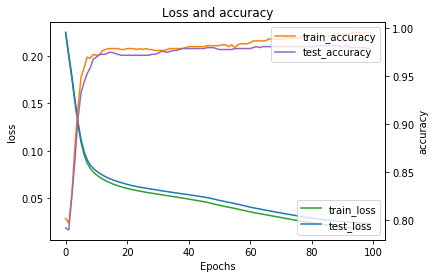

In [47]:
torch.manual_seed(100)
model.reset()
# set up optimizers
optimizer = optimizer_name(model, lr = best_lr)
# model training
loss_train_leaky, loss_test, acc_train, acc_test = train_cv(model, loss_name, optimizer,train_input,train_target,test_input,test_target, nb_epochs = nb_epochs, batch_size=batch_size)
# plots
plotLossAcc(loss_train_leaky, loss_test, acc_train, acc_test, torch.arange(nb_epochs), "Epochs")
plt.show()

#### 4. Tanh

In [49]:
# cross validation
torch.manual_seed(100)
lr_set = torch.logspace(-1, 0, 5)
model= Sequential(Linear(2,25), Tanh(), Linear(25,25), Tanh(),Linear(25,25), Tanh(), Linear(25,2), Tanh())
best_lr = cross_validation(model, optimizer_name, nb_epochs, batch_size, loss_name, k_fold, lr_set, train_input,train_target)
print(best_lr)

Running cross validation. Progress:   0.0 %
Running cross validation. Progress:   20.0 %
Running cross validation. Progress:   40.0 %
Running cross validation. Progress:   60.0 %
Running cross validation. Progress:   80.0 %
0.10000000149011612


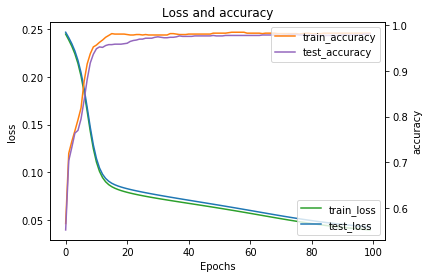

In [50]:
torch.manual_seed(100)
model.reset()
# set up optimizers
optimizer = optimizer_name(model, lr = best_lr)
# model training
loss_train_tanh, loss_test, acc_train, acc_test = train_cv(model, loss_name, optimizer,train_input,train_target,test_input,test_target, nb_epochs = nb_epochs, batch_size=batch_size)
# plots
plotLossAcc(loss_train_tanh, loss_test, acc_train, acc_test, torch.arange(nb_epochs), "Epochs")
plt.show()

#### Plot loss convergence comparison among different activation functions

In [76]:
torch.manual_seed(100)
def plotLoss(loss_tr,  x_var, xlabel):
    fig, ax1 = plt.subplots()
    color_tr = 'tab:green'
    color_te = 'tab:blue'
    color_tra = 'tab:orange'
    color_tea = 'tab:purple'
    ax1.set_xlabel(xlabel)
    ax1.plot(x_var, loss_tr[0], color=color_tr)
    ax1.plot(x_var, loss_tr[1], color=color_te)
    ax1.plot(x_var, loss_tr[2], color=color_tra)
    ax1.plot(x_var, loss_tr[3], color=color_tea)
    ax1.legend(["relu", "leaky relu", "elu", "tanh"])
    ax1.set_ylabel("training loss")
    ax1.set_title("loss comparison")

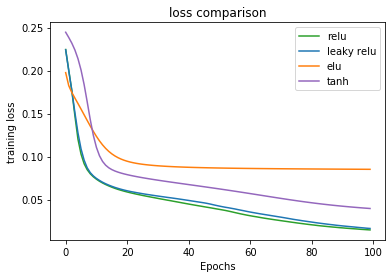

In [77]:
torch.manual_seed(100)
losses = [loss_train_relu, loss_train_leaky, loss_train_elu, loss_train_tanh]
plotLoss(losses,  torch.arange(nb_epochs), "Epochs")

### b. Optimizers comparison

We use Relu and Tanh(last layer) as activation function and MSE as loss function to test the loss convergence of different models with corresponding optimizers.  
SGD, momentSGD, Adagrad, Adam are tested with 100 epochs

In [53]:
# build model and loss function
torch.manual_seed(100)
model= Sequential(Linear(2,25), Relu(), Linear(25,25), Relu(),Linear(25,25), Relu(), Linear(25,2), Tanh())
loss = MSELoss()

#### 1. Adam

Running cross validation. Progress:   0.0 %
Running cross validation. Progress:   10.0 %
Running cross validation. Progress:   20.0 %
Running cross validation. Progress:   30.0 %
Running cross validation. Progress:   40.0 %
Running cross validation. Progress:   50.0 %
Running cross validation. Progress:   60.0 %
Running cross validation. Progress:   70.0 %
Running cross validation. Progress:   80.0 %
Running cross validation. Progress:   90.0 %
0.0010000000474974513


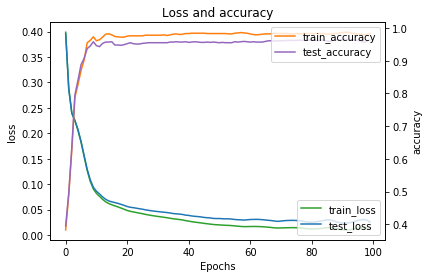

In [83]:
# cross validation
torch.manual_seed(100)
lr_set = torch.logspace(-5, -2, 10)
optimizer_name = Adam
best_lr = cross_validation(model, optimizer_name, nb_epochs, batch_size, loss, k_fold, lr_set, train_input,train_target)
print(best_lr)
model.reset()
# set up optimizers
optimizer = optimizer_name(model, lr = best_lr)
# model training
loss_train_adam, loss_test, acc_train, acc_test = train_cv(model, loss, optimizer,train_input,train_target,test_input,test_target, nb_epochs = nb_epochs, batch_size=batch_size)
# plots
plotLossAcc(loss_train_adam, loss_test, acc_train, acc_test, torch.arange(nb_epochs), "Epochs")
plt.show()

#### 2. Moment SGD

Running cross validation. Progress:   0.0 %
Running cross validation. Progress:   10.0 %
Running cross validation. Progress:   20.0 %
Running cross validation. Progress:   30.0 %
Running cross validation. Progress:   40.0 %
Running cross validation. Progress:   50.0 %
Running cross validation. Progress:   60.0 %
Running cross validation. Progress:   70.0 %
Running cross validation. Progress:   80.0 %
Running cross validation. Progress:   90.0 %
0.007742635905742645


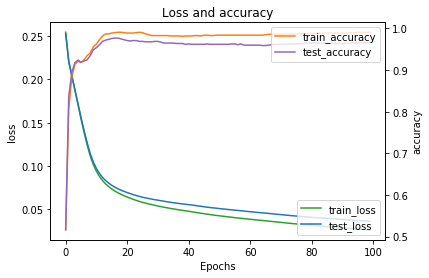

In [68]:
# cross validation
torch.manual_seed(100)
lr_set = torch.logspace(-4, -2, 10)
optimizer_name = MomentumSGD
best_lr = cross_validation(model, optimizer_name, nb_epochs, batch_size, loss, k_fold, lr_set, train_input,train_target)
print(best_lr)
model.reset()
# set up optimizers
optimizer = optimizer_name(model, lr = best_lr)
# model training
loss_train_moment, loss_test, acc_train, acc_test = train_cv(model, loss, optimizer,train_input,train_target,test_input,test_target, nb_epochs = nb_epochs, batch_size=batch_size)
# plots
plotLossAcc(loss_train_moment, loss_test, acc_train, acc_test, torch.arange(nb_epochs), "Epochs")
plt.show()

#### 3. Adagrad

Running cross validation. Progress:   0.0 %
Running cross validation. Progress:   10.0 %
Running cross validation. Progress:   20.0 %
Running cross validation. Progress:   30.0 %
Running cross validation. Progress:   40.0 %
Running cross validation. Progress:   50.0 %
Running cross validation. Progress:   60.0 %
Running cross validation. Progress:   70.0 %
Running cross validation. Progress:   80.0 %
Running cross validation. Progress:   90.0 %
0.0027825592551380396


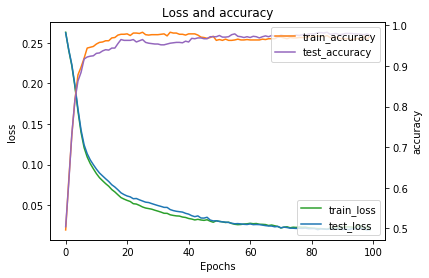

In [88]:
# cross validation
torch.manual_seed(100)
lr_set = torch.logspace(-3, -1, 10)
optimizer_name = AdaGrad
best_lr = cross_validation(model, optimizer_name, nb_epochs, batch_size, loss, k_fold, lr_set, train_input,train_target)
print(best_lr)
model.reset()
# set up optimizers
optimizer = optimizer_name(model, lr = best_lr)
# model training
loss_train_adagrad, loss_test, acc_train, acc_test = train_cv(model, loss, optimizer,train_input,train_target,test_input,test_target, nb_epochs = nb_epochs, batch_size=batch_size)
# plots
plotLossAcc(loss_train_adagrad, loss_test, acc_train, acc_test, torch.arange(nb_epochs), "Epochs")
plt.show()

#### 3. SGD

Running cross validation. Progress:   0.0 %
Running cross validation. Progress:   20.0 %
Running cross validation. Progress:   40.0 %
Running cross validation. Progress:   60.0 %
Running cross validation. Progress:   80.0 %
0.10000000149011612


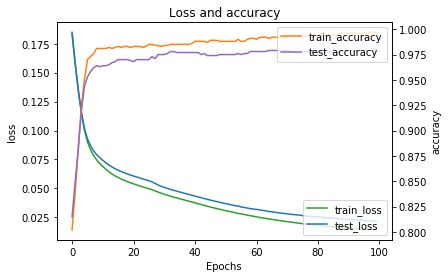

In [91]:
# cross validation
torch.manual_seed(100)
lr_set = torch.logspace(-3, -1, 5)
optimizer_name = SGD
best_lr = cross_validation(model, optimizer_name, nb_epochs, batch_size, loss, k_fold, lr_set, train_input,train_target)
print(best_lr)
model.reset()
# set up optimizers
optimizer = optimizer_name(model, lr = best_lr)
# model training
loss_train_sgd, loss_test, acc_train, acc_test = train_cv(model, loss, optimizer,train_input,train_target,test_input,test_target, nb_epochs = nb_epochs, batch_size=batch_size)
# plots
plotLossAcc(loss_train_sgd, loss_test, acc_train, acc_test, torch.arange(nb_epochs), "Epochs")
plt.show()

#### Plot loss convergence comparison among different activation functions

In [92]:
torch.manual_seed(100)
def plotLoss(loss_tr,  x_var, xlabel):
    fig, ax1 = plt.subplots()
    color_tr = 'tab:green'
    color_te = 'tab:blue'
    color_tra = 'tab:orange'
    color_tea = 'tab:purple'
    ax1.set_xlabel(xlabel)
    ax1.plot(x_var, loss_tr[0], color=color_tr)
    ax1.plot(x_var, loss_tr[1], color=color_te)
    ax1.plot(x_var, loss_tr[2], color=color_tra)
    ax1.plot(x_var, loss_tr[3], color=color_tea)
    ax1.set_ylabel("training loss")
    ax1.legend(["SGD", "moment", "adagrad", "adam"])
    ax1.set_title("loss comparison")

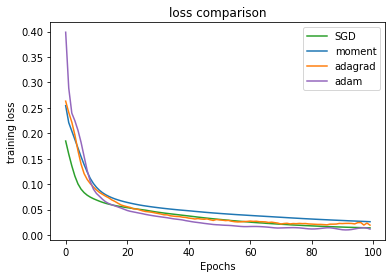

In [93]:
torch.manual_seed(100)
lossese = [loss_train_sgd, loss_train_moment, loss_train_adagrad, loss_train_adam]
plotLoss(lossese,  torch.arange(nb_epochs), "Epochs")